In [5]:
import pandas as pd
# Load the data from the 'spam' sheet
df = pd.read_excel('Spam Email Detection.xlsx', sheet_name='spam')

# Display the column names
column_names = df.columns.tolist()
column_names

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
# Display the first few rows of the dataset to understand its structure
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [9]:
df_cleaned = df_cleaned.rename(columns={'v1': 'Label', 'v2': 'EmailText'})


In [10]:
print(df_cleaned.head())


  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
print(df_cleaned['Label'].value_counts())


Label
ham     4825
spam     747
Name: count, dtype: int64


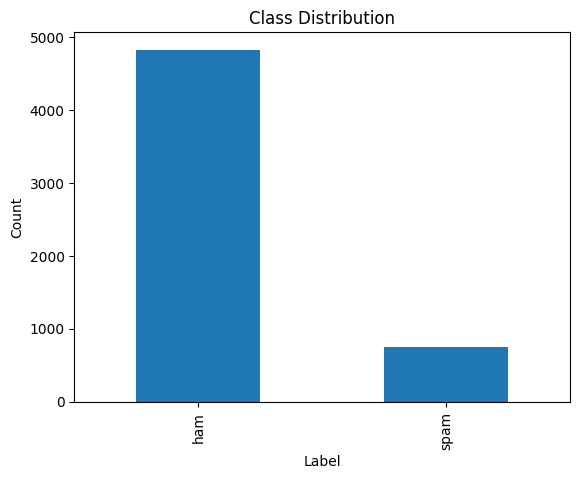

In [19]:
import matplotlib.pyplot as plt

df_cleaned['Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [12]:
print(df_cleaned[df_cleaned['Label'] == 'ham']['EmailText'].sample(5))
print(df_cleaned[df_cleaned['Label'] == 'spam']['EmailText'].sample(5))


4797       Just come home. I don't want u to be miserable
3777    Once a fishrman woke early in d mrng. It was v...
1991    No other Valentines huh? The proof is on your ...
4399                      Juz go google n search 4 qet...
2029               Thanx but my birthday is over already.
Name: EmailText, dtype: object
802     FREE for 1st week! No1 Nokia tone 4 ur mobile ...
3130    LookAtMe!: Thanks for your purchase of a video...
575     You have won ?1,000 cash or a ?2,000 prize! To...
3296    Todays Voda numbers ending 5226 are selected t...
3528    Xmas & New Years Eve tickets are now on sale f...
Name: EmailText, dtype: object


In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Text Preprocessing
def preprocess_text(text):
    # Ensure the input is a string
    text = str(text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

df_cleaned['ProcessedText'] = df_cleaned['EmailText'].apply(preprocess_text)


In [17]:
from sklearn.model_selection import train_test_split

X = df_cleaned['ProcessedText']
y = df_cleaned['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)


MultinomialNB()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test_vec)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[960   5]
 [ 14 136]]


In [21]:
def predict_email(text):
    processed_text = preprocess_text(text)
    vec_text = vectorizer.transform([processed_text])
    return clf.predict(vec_text)[0]

# Example usage
new_email = "Congratulations! You've won a free ticket to the Bahamas. Reply to claim."
print(predict_email(new_email))


spam


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Label
ham     4825
spam     747
Name: count, dtype: int64


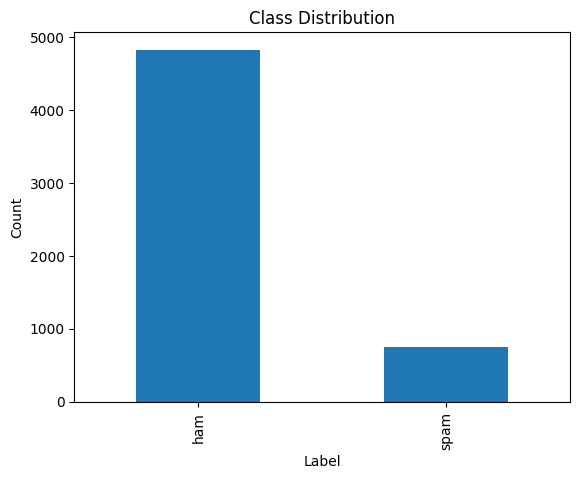

3654                      Senthil group company Apnt 5pm.
1152                               Ok i go change also...
2110                  Do we have any spare power supplies
5082    Amazing : If you rearrange these letters it gi...
2594    That���s the thing with apes, u can fight to t...
Name: EmailText, dtype: object
709     4mths half price Orange line rental & latest c...
1792    WIN: We have a winner! Mr. T. Foley won an iPo...
3966    YOU HAVE WON! As a valued Vodafone customer ou...
1733    Hi, this is Mandy Sullivan calling from HOTMIX...
1251    Please CALL 08712402779 immediately as there i...
Name: EmailText, dtype: object
Accuracy: 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98

In [23]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import nltk

# Download NLTK resources
nltk.download('stopwords')

# Load the data
df = pd.read_excel('Spam Email Detection.xlsx', sheet_name='spam')

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
df_cleaned = df_cleaned.rename(columns={'v1': 'Label', 'v2': 'EmailText'})

# Ensure all entries in 'EmailText' are strings and handle missing values
df_cleaned['EmailText'] = df_cleaned['EmailText'].astype(str)

# EDA: Check for class balance
print(df_cleaned['Label'].value_counts())

# Visualize the class distribution
df_cleaned['Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display some sample emails
print(df_cleaned[df_cleaned['Label'] == 'ham']['EmailText'].sample(5))
print(df_cleaned[df_cleaned['Label'] == 'spam']['EmailText'].sample(5))

# Text Preprocessing
def preprocess_text(text):
    # Ensure the input is a string
    text = str(text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

df_cleaned['ProcessedText'] = df_cleaned['EmailText'].apply(preprocess_text)

# Split the data
X = df_cleaned['ProcessedText']
y = df_cleaned['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = clf.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Predict new emails
def predict_email(text):
    processed_text = preprocess_text(text)
    vec_text = vectorizer.transform([processed_text])
    return clf.predict(vec_text)[0]

# Example usage
new_email = "Congratulations! You've won a free ticket to the Bahamas. Reply to claim."
print(predict_email(new_email))
